In [128]:
import numpy as np
import pandas as pd
from pathlib import Path

In [129]:
#Load data into data frame
#Data was generated from the "GenerateData.ipynb notebook"
crypto_df = pd.read_csv(Path('../Instructions/crypto_data.csv'))


In [130]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [131]:
crypto_df.dropna()
crypto_df=crypto_df.rename(columns={"Unnamed: 0": "Symbol"})
crypto_df

,Symbol,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [132]:

crypto1_df=crypto_df[crypto_df["IsTrading"]== True]
crypto1_df=crypto1_df[crypto1_df["TotalCoinsMined"] > 0]
crypto1_df=crypto1_df.drop(columns="IsTrading")
crypto1_df=crypto1_df.drop(columns="CoinName")
crypto1_df=crypto1_df.drop(columns="Symbol")
crypto1_df.head()
# crypto1_df["TotalCoinsMined"].unique()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [133]:

crypto1_df.dtypes


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [134]:
crypto1_df['TotalCoinSupply'] = crypto1_df['TotalCoinSupply'].astype(float, errors = 'raise')


In [135]:
crypto1_df.dtypes
crypto1_df=pd.get_dummies(crypto1_df)


In [136]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
crypto1_scaled_df=normalize(crypto1_df)
#crypto1_scaled_df = StandardScaler().fit_transform(crypto1_df)


In [154]:
crypto1_scaled_df
crypto1_scaled_df = pd.DataFrame(crypto1_scaled_df)

In [138]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=0.9)

# Get two principal components for the data.
crypto2_df = pca.fit_transform(crypto1_scaled_df)


In [141]:
len(crypto2_df[:,0])

532

In [142]:
len(crypto2_df[0,:])

1

In [143]:
tsne = TSNE(learning_rate=1000)
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto2_df)
tsne_features.shape

C:\Users\igrang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

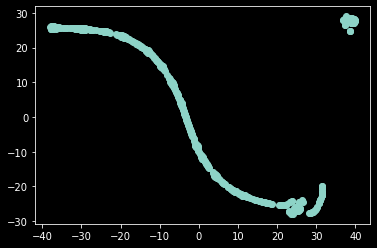

In [144]:
df=pd.DataFrame();
df['x'] = tsne_features[:,0]

# The second column of transformed features
df['y'] = tsne_features[:,1]
plt.scatter(df['x'], df['y'])
plt.show()

In [145]:
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto2_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,71.148619
1,2,26.207406
2,3,7.588565
3,4,3.392321
4,5,2.103110


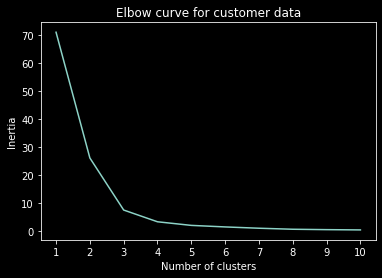

In [146]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [158]:

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data
clusters = get_clusters(3, crypto1_scaled_df)
print(clusters.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59,      60,      61,      62,      63,
            64,      65,      66,      67,      68,      69,      70,      71,
            72,      73,      74,      75,      76,      77,      78,      79,
            80,      81,      82,      83,      84,      85,      86,      87,
            88,      89,      90,      91,      92,      93,      94,      95,
            96,      97, 'class'],
      dtype='obje

C:\Users\igrang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\igrang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


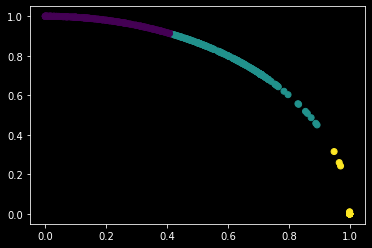

In [161]:

plt.scatter(clusters.iloc[:,0], clusters.iloc[:,1], c=clusters['class'])

plt.show()

